In [ ]:
from google.colab import drive
drive .mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
#file_id = '/content/drive/MyDrive/Colab Notebooks/Colab/data_week02.csv'
#downloaded = drive.CreateFile({'id': file_id})
#data_train = pd.read_excel('/gdrive/MyDrive/Colab Notebooks/Colab/Colab Notebooks/Dự đoán bóng đá.xlsx')
data_train = pd.read_csv("https://raw.githubusercontent.com/Sunbad2008/Web-d-o-n/main/premierleague.csv",delimiter='\t', header=None)
print(data_train)

            0      1           2         3              4           5  \
0          Id  Round  Start time    Status           Home  Home Score   
1    11352521     26  1708977600  finished       West Ham           4   
2    11352525     26  1708867800  finished         Wolves           1   
3    11352493     26  1708804800  finished        Arsenal           4   
4    11352490     26  1708795800  finished    Bournemouth           0   
..        ...    ...         ...       ...            ...         ...   
254  11352252      1  1691848800  finished       Brighton           4   
255  11352253      1  1691848800  finished        Everton           0   
256  11352254      1  1691848800  finished  Sheffield Utd           0   
257  11352251      1  1691841600  finished        Arsenal           2   
258  11352303      1  1691780400  finished        Burnley           0   

                  6           7            8  
0              Away  Away Score  Winner Code  
1         Brentford          

In [ ]:
from sklearn import preprocessing
data = data_train.values
attribute_data = data[:,0:2]
label_data = data[:,2]
convert_dataY = preprocessing.LabelEncoder()
convert_dataY.fit(label_data)
Y_train = convert_dataY.transform(label_data)
print(Y_train)

[1 1 1 1 1 0 0 1 0 1 0 1 0 2 1 0 1 0 2 2 2 1 2 0 0 0 1 0 2 0 1 2 1 2 0 0 2
 2 1 0 2 2 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 2 1 0 1 0 0 2 2 2 0 1 0
 1 0 2 0 1 0 0 0 1 0 2 1 0 2 1 1 0 0 0 0 0 1 1 1 0 2 2 0 0 2 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 2 2 0 2 0 0 0 1 0 0 0 1 2 0 0 0 1 2 0 0 1 1 0 2 0 1 2 0 0 1
 1 0 0 1 2 1 0 0 0 2 0 0 2 2 2 2 1 0 0 0 1 1 1 2 0 1 1 1 0 0 0 0 1 2 0 1 0
 1 1 2 2 0 2 1 2 0 0 0 1 0 1 1 0 0 0 0 2 1 1 0 2 1 1 1 1 1 2 2 1 0 1 0 1 0
 0 0 0 1 0 1 0 0 2 2 0 2 0 1 1 0 1]


In [ ]:
print(attribute_data)
convert_dataX = preprocessing.OrdinalEncoder()
convert_dataX.fit(attribute_data)
X_train = convert_dataX.transform(attribute_data)
print(X_train)

[['Id' 'Round' 'Start time' ... 'Home Score' 'Away' 'Away Score']
 ['11352521' '26' '1708977600' ... '4' 'Brentford' '2']
 ['11352525' '26' '1708867800' ... '1' 'Sheffield Utd' '0']
 ...
 ['11352254' '1' '1691848800' ... '0' 'Crystal Palace' '1']
 ['11352251' '1' '1691841600' ... '2' 'Forest' '1']
 ['11352303' '1' '1691780400' ... '0' 'Man City' '3']]
[[258.  26. 162. ...   7.   2.   8.]
 [156.  18. 161. ...   4.   4.   2.]
 [159.  18. 160. ...   1.  17.   0.]
 ...
 [  4.   0.   2. ...   0.   8.   1.]
 [  1.   0.   1. ...   2.  10.   1.]
 [  6.   0.   0. ...   0.  14.   3.]]


In [ ]:
#from sklearn.tree import DecisionTreeClassifier

#Dtree_Model = DecisionTreeClassifier()
#Dtree_Model.fit(X_train, Y_train)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [259, 239]

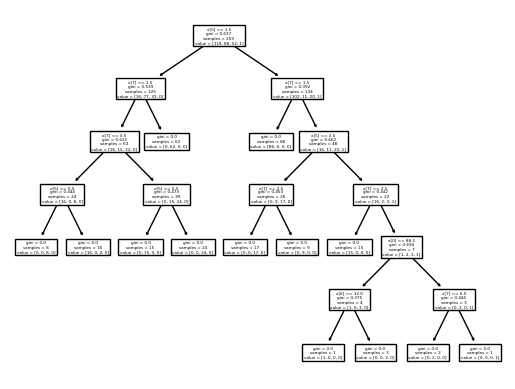

In [ ]:
#from matplotlib import pyplot as plt
#from sklearn import tree
#tree.plot_tree(Dtree_Model)
#plt.show()

In [ ]:
# @title Default title text { vertical-output: true, display-mode: "both" }
Team1_input = 'Liverpool' # @param["Arsenal","Aston Villa","Bournemouth","Brentford","Brighton","Burnley","Chelsea","Crystal Palace","Everton","Fulham","Liverpool","Luton","Man City","Man Utd","Newcastle","Forest","Sheffield Utd","Tottenham ","West Ham","Wolves"] {allow-input: false}
Team2_input = 'Bournemouth' # @param["Arsenal","Aston Villa","Bournemouth","Brentford","Brighton","Burnley","Chelsea","Crystal Palace","Everton","Fulham","Liverpool","Luton","Man City","Man Utd","Newcastle","Forest","Sheffield Utd","Tottenham ","West Ham","Wolves"] {allow-input: false}

#Phần quang trọng
X_test = convert_dataX.transform([(Team1_input,Team2_input)])
print(X_test)
Y_test = Dtree_Model.predict(X_test)
Y_label = "Thắng"
if  Y_test[0]==0:Y_label = "Thắng"
if  Y_test[0]==1:Y_label = "Thua"
if  Y_test[0]==2:Y_label = "Hoà"
print("Kết quả", Y_test, "-->", Y_label)

ValueError: X has 2 features, but OrdinalEncoder is expecting 8 features as input.